In [36]:
 #Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan



In [39]:
from pandas import ExcelWriter 
from pandas import ExcelFile

In [42]:
FlightData = pd.read_excel("Flights delay data original .xlsx")

### Part 1: Exploratory Analysis
Investigation of departure and arrival delay related features through exploratory analysis.

In [43]:
FlightData


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,...,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,...,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,...,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,...,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### 1. About Features and Observations¶

In [44]:
print("Number of Observations(Rows) are: ",FlightData.shape[0])
print("Number of Features(Columns) are: ",FlightData.shape[1])

Number of Observations(Rows) are:  1048575
Number of Features(Columns) are:  31


In [45]:
# Feature Names and about them
FlightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

#### 2. Different airlines and their counts

In [46]:
print ("Number of different Airlines:",FlightData['AIRLINE'].nunique() )
print ("Airline Count",FlightData['AIRLINE'].value_counts(), sep='\n')

Number of different Airlines: 14
Airline Count
WN    221586
DL    147486
EV    111206
OO    107099
AA     97549
UA     87606
US     73942
MQ     65513
B6     48157
AS     29614
NK     19612
F9     14669
HA     14133
VX     10403
Name: AIRLINE, dtype: int64


The top three airlines are WN = Southwest, DL = Delta, EV = Atlantic Southeast Airlines

#### 3. Any missing values in the departure delays and arrival delays? If yes, do they match? Potential reason(s) and removing these observations afterwards.


In [47]:
# sum of null values in departure delay 
Dep_Delay = FlightData['DEPARTURE_DELAY'].isnull().sum()
print("Missing values of Departure Delays are:",Dep_Delay)

# sum of null values in arrival delay 
Arvl_Delay=FlightData['ARRIVAL_DELAY'].isnull().sum()
print("Missing values of Arrival Delays are:",Arvl_Delay)

# check (boolean) if both numbers are same
print("Do they match?:", Arvl_Delay == Dep_Delay)

Missing values of Departure Delays are: 39515
Missing values of Arrival Delays are: 43071
Do they match?: False


In [48]:
 #find why observations don't match
FlightData[np.isnan(FlightData.ARRIVAL_DELAY)][['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY',
                                                'SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_TIME']].head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_TIME
32,135,NaN,NaN,600,NaN,NaN
42,200,NaN,NaN,500,NaN,NaN
68,510,NaN,NaN,637,NaN,NaN
82,525,NaN,NaN,700,NaN,NaN
90,530,NaN,NaN,700,NaN,NaN


In [49]:
Dep_time = FlightData['DEPARTURE_TIME'].isnull().sum()
print("Missing values of Departure time are:",Dep_time)

Arr_time = FlightData['ARRIVAL_TIME'].isnull().sum()
print("Missing values of Arrival time are:",Arr_time)

Missing values of Departure time are: 39515
Missing values of Arrival time are: 41296


Observation: Missing values dont match because:

Departure Delay and Arrival delay are calculated based on recorded actual time & scheduled time respectively, i.e. Departure Delay = Departure time - Scheduled Departure

Since, data is not recorded for Departure time & Arrival time, there are missing values for Departure Delay and Arrival delay.

Remaining records for arrival delay, have missing values which are not calculated even though there are records for Arrival time and Arrival Departure due to reasons that can be explored further.

Exploring if diverted and canceled feature are reasons for these missing values.

In [50]:
print(FlightData.CANCELLED.sum())
print(FlightData.DIVERTED.sum())
print((FlightData.CANCELLED != FlightData.DIVERTED).sum()) #They add up to cases, which is the total arrival delay.

40527
2544
43071


In [51]:
FlightData.loc[(FlightData.CANCELLED == 1) & (FlightData.DEPARTURE_DELAY.notnull())] 
# The flights that are canceled but have departure delay value.

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4391,2015,1,1,4,MQ,2758,N939MQ,ROW,DFW,1110,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
4766,2015,1,1,4,EV,4503,N14514,IAH,BRO,1134,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
7441,2015,1,1,4,EV,4264,N27962,STL,IAH,1423,...,NaN,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN
8516,2015,1,1,4,EV,4707,N11526,IAH,HRL,1530,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
10454,2015,1,1,4,MQ,3240,N925MQ,PIA,DFW,1735,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046503,2015,3,10,2,B6,1511,N594JB,EWR,RSW,810,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
1046674,2015,3,10,2,EV,2517,N904EV,DFW,MLI,820,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
1047428,2015,3,10,2,MQ,3251,N544MQ,DFW,CID,900,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
1047954,2015,3,10,2,EV,5888,N29917,BOS,CLE,936,...,NaN,NaN,0,1,C,NaN,NaN,NaN,NaN,NaN


This explains missing observations in the data. Numnber of Flights are being canceled, so there is no departure delay, and were diverted so there is no arrival record. However, there are some flights that were canceled but have a departure delay. This could be because they took off but landed at the origin airport due to some technical difficulty.

In [52]:
# remove observations with nan for departure and arrival delay
FlightData.dropna(subset=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'],inplace = True)
print("New number of Observations(Rows) removing missing values are: ",FlightData.shape[0])

New number of Observations(Rows) removing missing values are:  1005504


#### 4. Observations through average and median departure and arrival delay

In [53]:
# data.mean() and data.median()
print('Average Departure delay is ',FlightData['DEPARTURE_DELAY'].mean(), 'and Median Departure delay is',FlightData['DEPARTURE_DELAY'].median())
print('Average Arrival delay is ',FlightData['ARRIVAL_DELAY'].mean(), 'and Median Arrival delay is',FlightData['ARRIVAL_DELAY'].median())

Average Departure delay is  11.236489362548532 and Median Departure delay is -1.0
Average Arrival delay is  7.6121905034689075 and Median Arrival delay is -3.0


Observation: Mean and median gives a centre of distribution of data and they are different for this dataset. It is observed that on an average departure delays are around 11 minutes. However, arrival delays on an average are less and almost 7 mintues. So there is little longer departure delay compared to arrival delays probably because airplane fly faster to make up for the delay.

Also, median values reflect that flights actually depart and arrive early, approximately 1 & 3 minutes respectively. However, no conclusion can be drawn yet from mean or median values without diagnosis.

#### 5. Departure delays and arrival delays for each airline

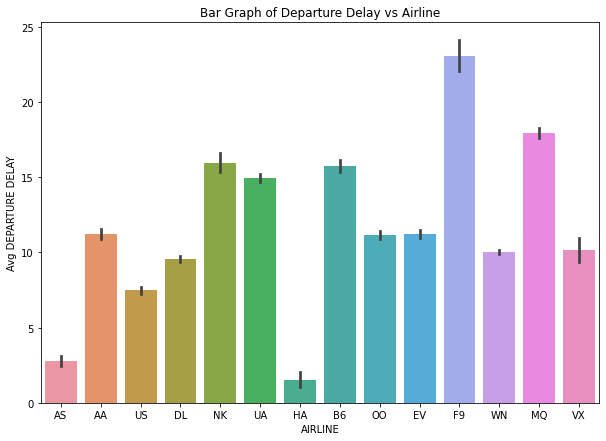

In [54]:
# Departure Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax1 = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=FlightData )
plt.xlabel("AIRLINE")
plt.ylabel("Avg DEPARTURE DELAY")
plt.title("Bar Graph of Departure Delay vs Airline")
plt.show()

Most airlines have minimal departure delays. NK (Spirit Air Lines), MQ (American Eagle Airlines Inc) and F9 (Frontier Airlines) show more variability/some extreme values.

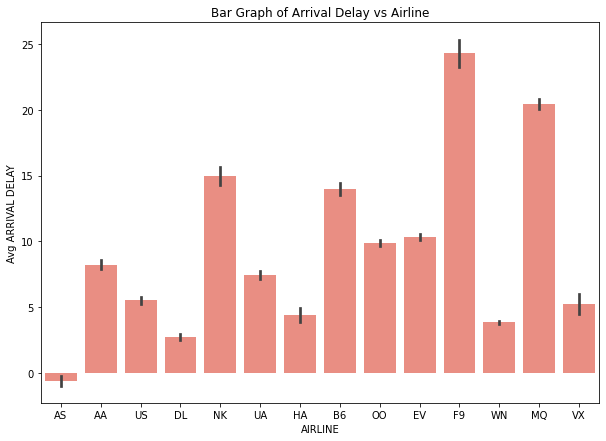

In [55]:
# Arrival Delay vs Airline
fig = plt.figure(1, figsize=(10,7))
ax2 = sns.barplot(x="AIRLINE", y="ARRIVAL_DELAY", data=FlightData, color="salmon" )
plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL DELAY")
plt.title("Bar Graph of Arrival Delay vs Airline")
plt.show()

Arrival delay variability seems similar with few outliers. Again, MQ (American Eagle Airlines) and F9 (Frontier Airlines) has the most extreme arrival delay.

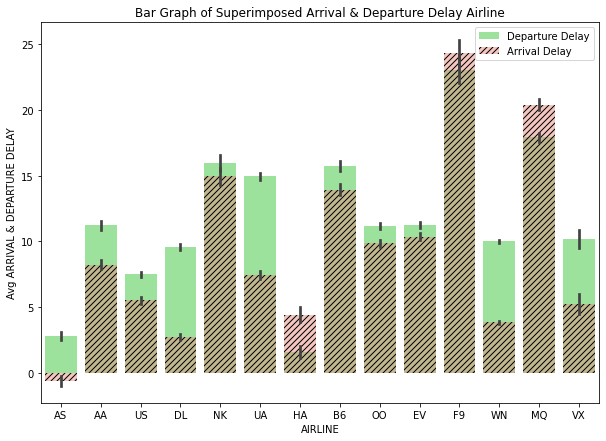

In [56]:
# superimposing both graphs to see difference
fig = plt.figure(1, figsize=(10,7))
labels = ['green','hatch']
ax3 = sns.barplot(y="DEPARTURE_DELAY", x="AIRLINE", data=FlightData, color="lightgreen", label = 'Departure Delay')
ax3 = sns.barplot(y="ARRIVAL_DELAY", x="AIRLINE", data=FlightData, color="salmon", hatch = '////',alpha = 0.5, label = 'Arrival Delay')


plt.xlabel("AIRLINE")
plt.ylabel("Avg ARRIVAL & DEPARTURE DELAY")
plt.title("Bar Graph of Superimposed Arrival & Departure Delay Airline")
plt.legend()
plt.show()


Observation: It is observed through superimposed graph that departure delays are higher than arrival delays. One can assume that airlines probably increase speed to minimize delays.

....

#### 6. 5 number summary (min, Q1, median, Q3, max) of departure delay and arrival delay for each airline arranged by median delay (descending order).

In [57]:
# describe to print 5 number summary
# descending order of median = 50%
Dep_Delay = FlightData.groupby('AIRLINE')['DEPARTURE_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Departure Delay",Dep_Delay.sort_values(by='50%',ascending=False), sep='\n')

Arvl_Delay = FlightData.groupby('AIRLINE')['ARRIVAL_DELAY'].describe()[['max', '75%','50%','25%', 'min']]
print("Arrival Delay",Arvl_Delay.sort_values(by='50%',ascending=False), sep='\n')

Departure Delay
            max    75%  50%  25%   min
AIRLINE                               
UA        886.0  17.00  2.0 -3.0 -40.0
F9        996.0  26.75  0.0 -6.0 -32.0
MQ       1154.0  24.00  0.0 -5.0 -29.0
WN        604.0  12.00  0.0 -3.0 -17.0
B6        942.0  18.00 -1.0 -5.0 -27.0
DL       1184.0   7.00 -1.0 -4.0 -61.0
NK        634.0  18.00 -1.0 -5.0 -28.0
AA       1988.0   9.00 -2.0 -5.0 -29.0
EV        726.0   9.00 -2.0 -6.0 -33.0
US        726.0   6.00 -2.0 -5.0 -26.0
VX        577.0   7.00 -2.0 -5.0 -20.0
HA       1433.0   2.00 -3.0 -6.0 -26.0
OO        931.0   9.00 -3.0 -6.0 -48.0
AS        735.0   1.00 -4.0 -8.0 -47.0
Arrival Delay
            max   75%  50%   25%   min
AIRLINE                               
F9       1005.0  31.0  5.0  -8.0 -47.0
MQ       1152.0  31.0  4.0  -8.0 -60.0
NK        631.0  22.0  1.0 -10.0 -59.0
B6        952.0  21.0  0.0 -12.0 -76.0
HA       1467.0   8.0  0.0  -5.0 -52.0
EV        723.0  14.0 -1.0 -11.0 -60.0
OO        953.0  13.0 -2.0 -11.0 -

#### 7. Top 10 airports with most averaged departure delay and analysis of top airport for potential reason¶

In [58]:
Avg_dep_delay = FlightData.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
print(Avg_dep_delay.head(10))

ORIGIN_AIRPORT
TTN    38.993865
ILG    35.039216
OTH    26.305556
SCE    24.116788
ABR    23.261194
SMX    22.984962
BPT    22.971751
CEC    22.024793
BGR    21.900000
CMI    21.440594
Name: DEPARTURE_DELAY, dtype: float64


In [60]:
# find cause of top airport by count of various delay reasons at 14960 Origin Airport 
FlightData[(FlightData['ORIGIN_AIRPORT']=='TTN')][['DEPARTURE_DELAY',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','AIR_TIME', 'DISTANCE']]

,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_TIME,DISTANCE
303,-3.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,109.0,701
817,24.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,373
1384,11.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,103.0,532
2061,19.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,147.0,1026
4325,6.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,155.0,1028
...,...,...,...,...,...,...,...,...,...,...,...,...
1039931,-1.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,77.0,484
1044212,-1.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,109.0,701
1045015,-6.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,62.0,373
1045886,-10.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,136.0,896


Observation: "TTN"  origin airport (Trenton Mercer Airport from Trenton) has highest average departure delay.Diving deeper shows there is only one observation for this airport with departure delay of 250 min and arrival delay of 236 min. The flight was not diverted or cancelled but the flight was delayed due to airline delay of 236 min.

#### 8. Intuitive analysis - Study if the departure/arrival delay is influenced by distance of trip.

In [61]:
Distance_corr = FlightData[['DISTANCE', 'DEPARTURE_DELAY','ARRIVAL_DELAY']]
Distance_corr.corr()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,0.019357,-0.026894
DEPARTURE_DELAY,0.019357,1.000000,0.941676
ARRIVAL_DELAY,-0.026894,0.941676,1.000000


Observation: Correlation matrix shows a very low correlation of distance with both departure and arrival delays.

Text(0, 0.5, 'DEPARTURE DELAY')

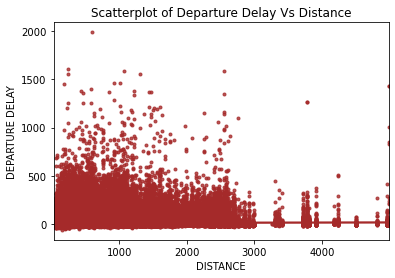

In [62]:
 #scatter plot with regression line

scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'DEPARTURE_DELAY', data = FlightData, color = "brown",marker = '.' )

ax.set_title('Scatterplot of Departure Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('DEPARTURE DELAY')

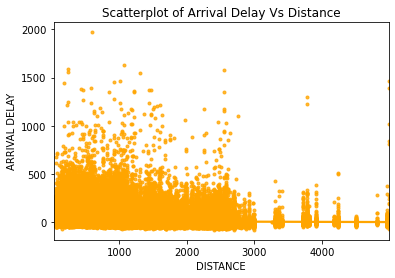

In [63]:
# scatter plot with regression line
scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'ARRIVAL_DELAY', data = FlightData, color = "orange", marker = '.')

ax.set_title('Scatterplot of Arrival Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('ARRIVAL DELAY')

plt.show()

Observation: With further diagnosis, scatter plot shows no particular pattern or trend of distance with departure or arrival delay. If we plot a regression line, it is almost parallel to X axis which implies predictor Distance has no implication on Departure or Arrival Delay. The same is seen in correlation matrix.



#### 9. Intuitive analysis - Day of week vs departure delay

In [64]:
Week_corr= FlightData[['DAY_OF_WEEK', 'DEPARTURE_DELAY','ARRIVAL_DELAY']]
Week_corr.corr()


,DAY_OF_WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY
DAY_OF_WEEK,1.000000,-0.001466,-0.006548
DEPARTURE_DELAY,-0.001466,1.000000,0.941676
ARRIVAL_DELAY,-0.006548,0.941676,1.000000


,count,mean,std,min,25%,50%,75%,max
DAY_OF_WEEK,,,,,,,,
1,151782.0,13.912836,42.255813,-61.0,-4.0,0.0,14.0,1429.0
2,136886.0,11.044585,38.203858,-48.0,-5.0,-1.0,10.0,1557.0
3,137276.0,7.994726,33.965606,-38.0,-5.0,-2.0,7.0,1589.0
4,153683.0,11.373847,38.274901,-35.0,-5.0,-1.0,11.0,1367.0
5,159948.0,10.603046,36.108569,-42.0,-4.0,-1.0,11.0,1988.0
6,125037.0,9.057551,37.809488,-39.0,-5.0,-2.0,8.0,1587.0
7,140892.0,14.201317,44.530066,-47.0,-4.0,-1.0,14.0,1604.0


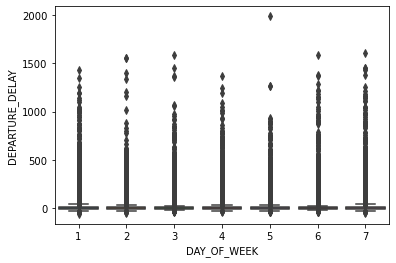

In [65]:
sns.boxplot(x = 'DAY_OF_WEEK', y = 'DEPARTURE_DELAY', data = FlightData)
FlightData.groupby('DAY_OF_WEEK').describe()['DEPARTURE_DELAY']

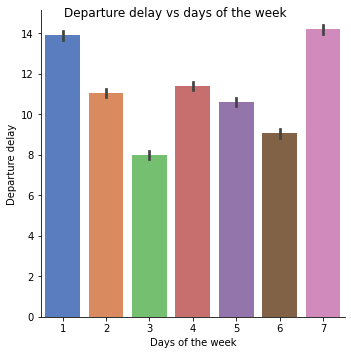

In [66]:
# Graph showing variation in departure delay as per day of the week.
ax = sns.catplot(x = 'DAY_OF_WEEK', y = 'DEPARTURE_DELAY', data = FlightData , kind = "bar", palette = "muted")

ax.set_xlabels('Days of the week')
ax.set_ylabels('Departure delay')

ax.fig.suptitle('Departure delay vs days of the week')

plt.show()

Observation: Numerical summary shows Wednesdays and Saturdays have a lower average departure delay, while the Mondays and Sundays shows higher average delay and rest of the week is quite consistent. Boxplot shows no particular trend because of outliers, therefore, departure delays does not have any relation with the days of the week. It is also seen in the correlation matrix where the value is extremely low (-0.001) between the two.

#### 10. Exploring if there is a departure delay (i.e. positive values for departure delay), does distance have anything to do with arrival delay? Presuming longer distance flights can make up more time.

In [67]:
# Create dataframe with positive departure delays only
FD_dep_delay= FlightData[FlightData['DEPARTURE_DELAY']>0][['AIRLINE','DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY']]

# check correlation
FD_dep_delay.corr()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,-0.020980,-0.063647
DEPARTURE_DELAY,-0.020980,1.000000,0.959378
ARRIVAL_DELAY,-0.063647,0.959378,1.000000


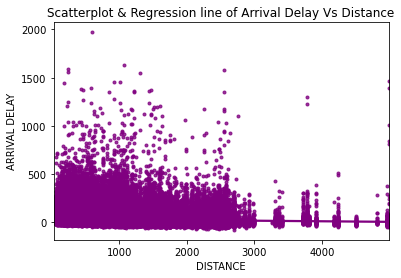

In [68]:
# scatter plot with regression line
scatter, ax = plt.subplots()
ax = sns.regplot(x = 'DISTANCE', y = 'ARRIVAL_DELAY', data = FD_dep_delay, color = "purple",marker = '.')

ax.set_title('Scatterplot & Regression line of Arrival Delay Vs Distance')
ax.set_xlabel('DISTANCE')
ax.set_ylabel('ARRIVAL DELAY')

plt.show()

Observation: Graph still shows arrival delays does not have any relation with distance. It is also seen in the correlation matrix where the value is extremely low (-0.06) between the two.





#### 11. Analyse Departure delays.
How many flights overall were delayed in 2015? From those delayed, how are the Departure delay thresholds (15 minutes, 1 hour, more than one hour) distributed overall and for each airlines? For example, are more airlines delayed under 15 minutes or more than an hour?

In [69]:
# Approach
# Part 1: Piechart to see the percentage of overall on-time & delayed flights
# Part 2: Bargraph to see the various levels of delay (short, medium & high) for every airline.
# Part 3: Piechart to summarize the observation of bar graph above to overall percentage.

# Part 1
# create a column to find how many flights out of the total are on-time and delayed.
FlightData['Dep_Delay_Overall'] = 'On_Schedule'
FlightData.loc[(FlightData.DEPARTURE_DELAY > 0),'Dep_Delay_Overall'] = 'Delayed'
print (FlightData.head(3))


# Count type and frequency
Overall_Delay_chart= FlightData['Dep_Delay_Overall'].value_counts()
Overall_Delay_chartds= pd.Series(Overall_Delay_chart) # Dataseries for value counts of unique dummy values
print ("Unique values are:",Overall_Delay_chartds, sep='\n')

Schedule_Type=FlightData['Dep_Delay_Overall'].unique() #for Label

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_DELAY  \
0            ANC                 SEA                    5  ...          -22.0   
1            LAX                 PBI                   10  ...           -9.0   
2            SFO                 CLT                   20  ...            5.0   

   DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0         0          0                  NaN               NaN             NaN   
1         0          0                  NaN               NaN             NaN   
2         0          0                  NaN               NaN             NaN   

   AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  Dep_Delay_O

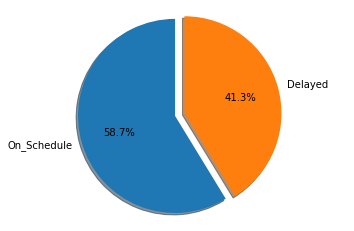

In [70]:
# Piechart for on-time & delay percentage
fig1,ax1= plt.subplots()
explode = (0.1, 0)
ax1.pie(Overall_Delay_chartds, labels=Schedule_Type, autopct='%.1f%%', startangle=90, shadow = True, explode = explode)
ax1.axis('equal')

plt.show()


Observation: Pie Chart shows 41.3% flights delayed.

In [71]:
# Part 2

# Further, Level of delays are added as dummy variables to see for each airline
# To the positive delayed flights from Q10, add time based delays. Categories are as below:
# short: 1-15 minutes
# Medium: 16-60 minutes
# High: above 60 minutes

# create dummy column for delay levels
FD_dep_delay['Delay_lvl'] = 'Short'
FD_dep_delay.loc[(FD_dep_delay.DEPARTURE_DELAY >=15)&(FD_dep_delay.DEPARTURE_DELAY <=60),'Delay_lvl']='Medium'
FD_dep_delay.loc[(FD_dep_delay.DEPARTURE_DELAY >=60),'Delay_lvl']='High'
FD_dep_delay.head()

,AIRLINE,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,Delay_lvl
7,US,2125,14.0,-10.0,Short
9,DL,1747,3.0,-15.0,Short
20,NK,1139,25.0,6.0,Medium
27,NK,1487,12.0,25.0,Short
29,AA,1709,21.0,2.0,Medium


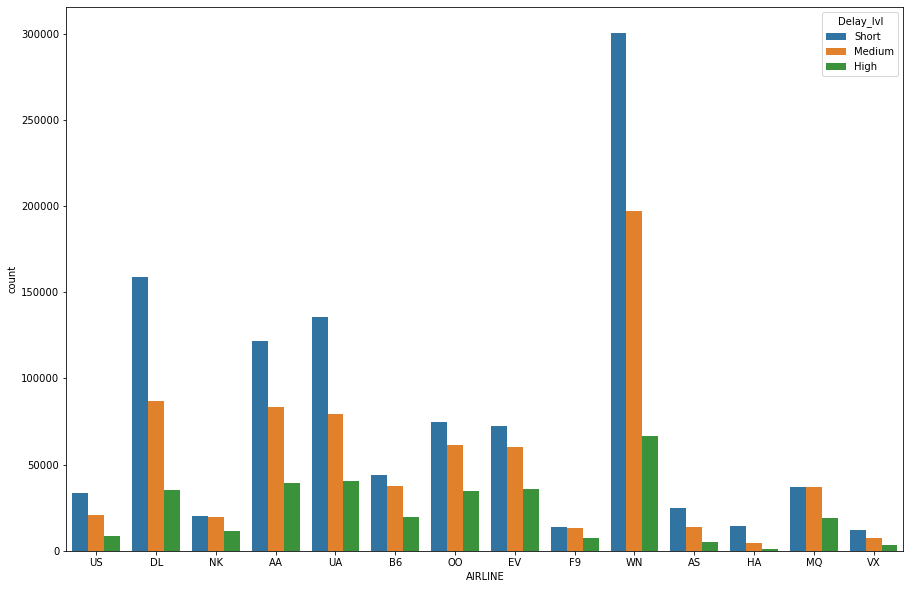

In [30]:
# Graph showing distribution of delay levels for each airline
fig = plt.figure(1, figsize=(15,10))
ax = sns.countplot(x="AIRLINE", hue='Delay_lvl', data=FD_dep_delay)

Observation: Graph shows most short delays, i.e. from 1 to 15 minutes for airlines. Also, longer than one hour delays are least. Further, at first glance, predominantly, trend is high delays (longer than 1 hour) are one-third of the short delays.
Let's check the individual percentage of overall delay levels to see if our observation is correct.

In [72]:
# Part 3
# Overall percentage of delay levels

# Count type and frequency
Lvl_Delay_chart= FD_dep_delay['Delay_lvl'].value_counts()

Lvl_Delay_chartds= pd.Series(Lvl_Delay_chart) # Dataseries for value counts of unique dummy values
print ("Unique values are:", Lvl_Delay_chartds, sep='\n')

Lvl_Type = FD_dep_delay['Delay_lvl'].unique() # For Label

Unique values are:
Short     197306
Medium    150655
High       66979
Name: Delay_lvl, dtype: int64


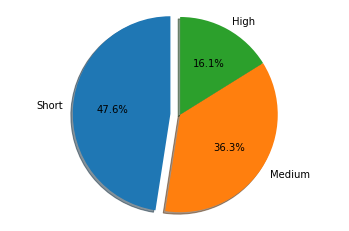

In [73]:
# Piechart of delay level percentage 
fig2,ax2= plt.subplots()
explode = (0.1, 0,0)
ax2.pie(Lvl_Delay_chartds, labels=Lvl_Type, autopct='%.1f%%', startangle=90, shadow = True, explode = explode)
ax2.axis('equal')

plt.show()

Observation: Pie Chart shows 47.6% of the flights delayed are under minutes. Also, 36.3% of the flights are departure delays of less than an hour.
Trend as seen in the bar graph was high delays are one third of short delays which is also seen in the pie chart.

#### 12. Exploring if there a specific time (or time period) in the day when flight departures are usually delayed or are usually on time.¶

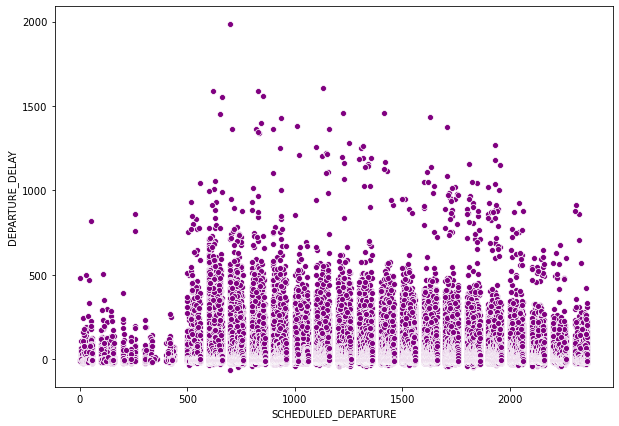

In [74]:
# Part 1: Scatter plot to diagnose a trend (if any)
# Part 2: Bar graph to see if trend shows any insight as per time slot of the day (morning, daytime, evening & late/early hours)

# Part 1
# Hourly scatter plot 
fig = plt.figure(1, figsize=(10,7))
ax = sns.scatterplot(x="SCHEDULED_DEPARTURE", y="DEPARTURE_DELAY", data=FlightData, color = "purple",marker = 'o')

Observation: Graph shows minimal delays particulary around 12am to 5am. Lets analyse time period wise

In [75]:
# Part 2
# further analysis by time period
# Morning :         6am to 12pm
# Daytime:          12pm to 6pm
# Evening :         6pm to 12pm
# Late/Early hours: 12pm to 6am

# creating parts of the day and adding to dataframe
FlightData['Time_Dummy'] = 'Late/Early_Hours'
FlightData.loc[(FlightData.SCHEDULED_DEPARTURE > 600) & (FlightData.SCHEDULED_DEPARTURE <= 1200),'Time_Dummy'] = 'Morning'
FlightData.loc[(FlightData.SCHEDULED_DEPARTURE > 1200) & (FlightData.SCHEDULED_DEPARTURE <= 1800),'Time_Dummy'] = 'Daytime'
FlightData.loc[(FlightData.SCHEDULED_DEPARTURE > 1800) & (FlightData.SCHEDULED_DEPARTURE <= 2400),'Time_Dummy'] = 'Evening'
FlightData.loc[FlightData.SCHEDULED_DEPARTURE > 2400,'Time_Dummy'] = 'Late/Early_Hours'

FlightData.head(6)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Dep_Delay_Overall,Time_Dummy
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Late/Early_Hours
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Late/Early_Hours
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Late/Early_Hours
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Late/Early_Hours
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Late/Early_Hours
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,On_Schedule,Late/Early_Hours


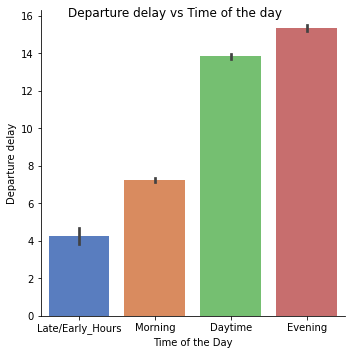

In [76]:
# graph of Departure delays vs Time period
ax = sns.catplot(x = 'Time_Dummy', y = 'DEPARTURE_DELAY', data = FlightData , kind = "bar", palette = "muted")

ax.set_xlabels('Time of the Day')
ax.set_ylabels('Departure delay')
ax.fig.suptitle('Departure delay vs Time of the day')

plt.show()

Observation: Graph shows an interesting pattern- a progressive delay with time of the day. We observe least delay from 12pm to 6am and most delays during evening.



In [77]:
FlightData.to_csv("Afterchanges in Flight Data.csv")